In [135]:
import pandas as pd

data = pd.read_csv("preprocessed_apartment_rentals_one_hot_encoded_states.csv")
print(data["state"])
# alle Spalten droppen, die mit 'state_' anfangen
cols_to_drop = [col for col in data.columns if col.startswith("state_")]
data = data.drop(columns=cols_to_drop)
data.to_csv("preprocessed_apartment_rentals_no_state_dummies_nocluster.csv", index=False)



0        CA
1        VA
2        NC
3        CA
4        NM
         ..
98617    TX
98618    FL
98619    CA
98620    NC
98621    CA
Name: state, Length: 98622, dtype: object


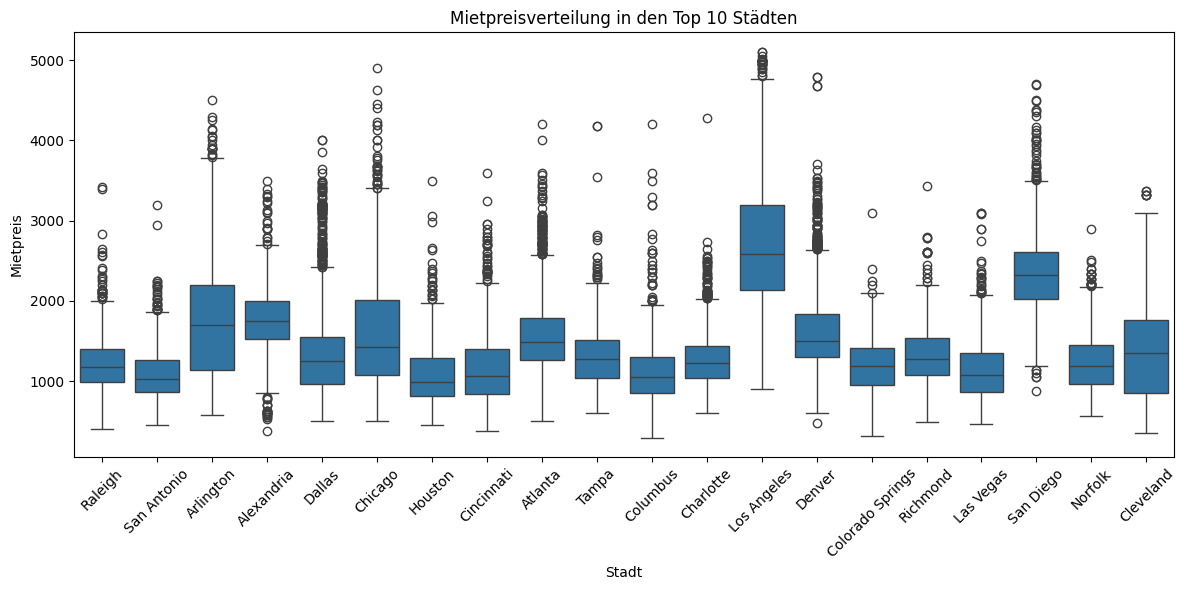

C:\Users\User\AppData\Local\Temp\ipykernel_26148\1948297920.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cityname', y='price', data=data_top, inner='quartile', palette='pastel')


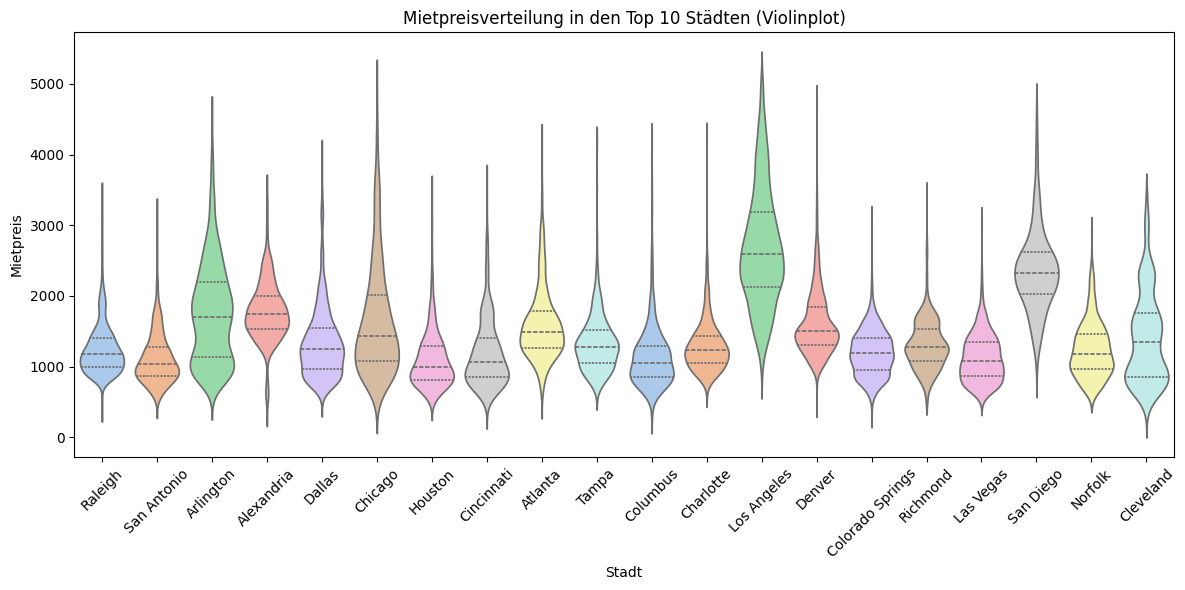

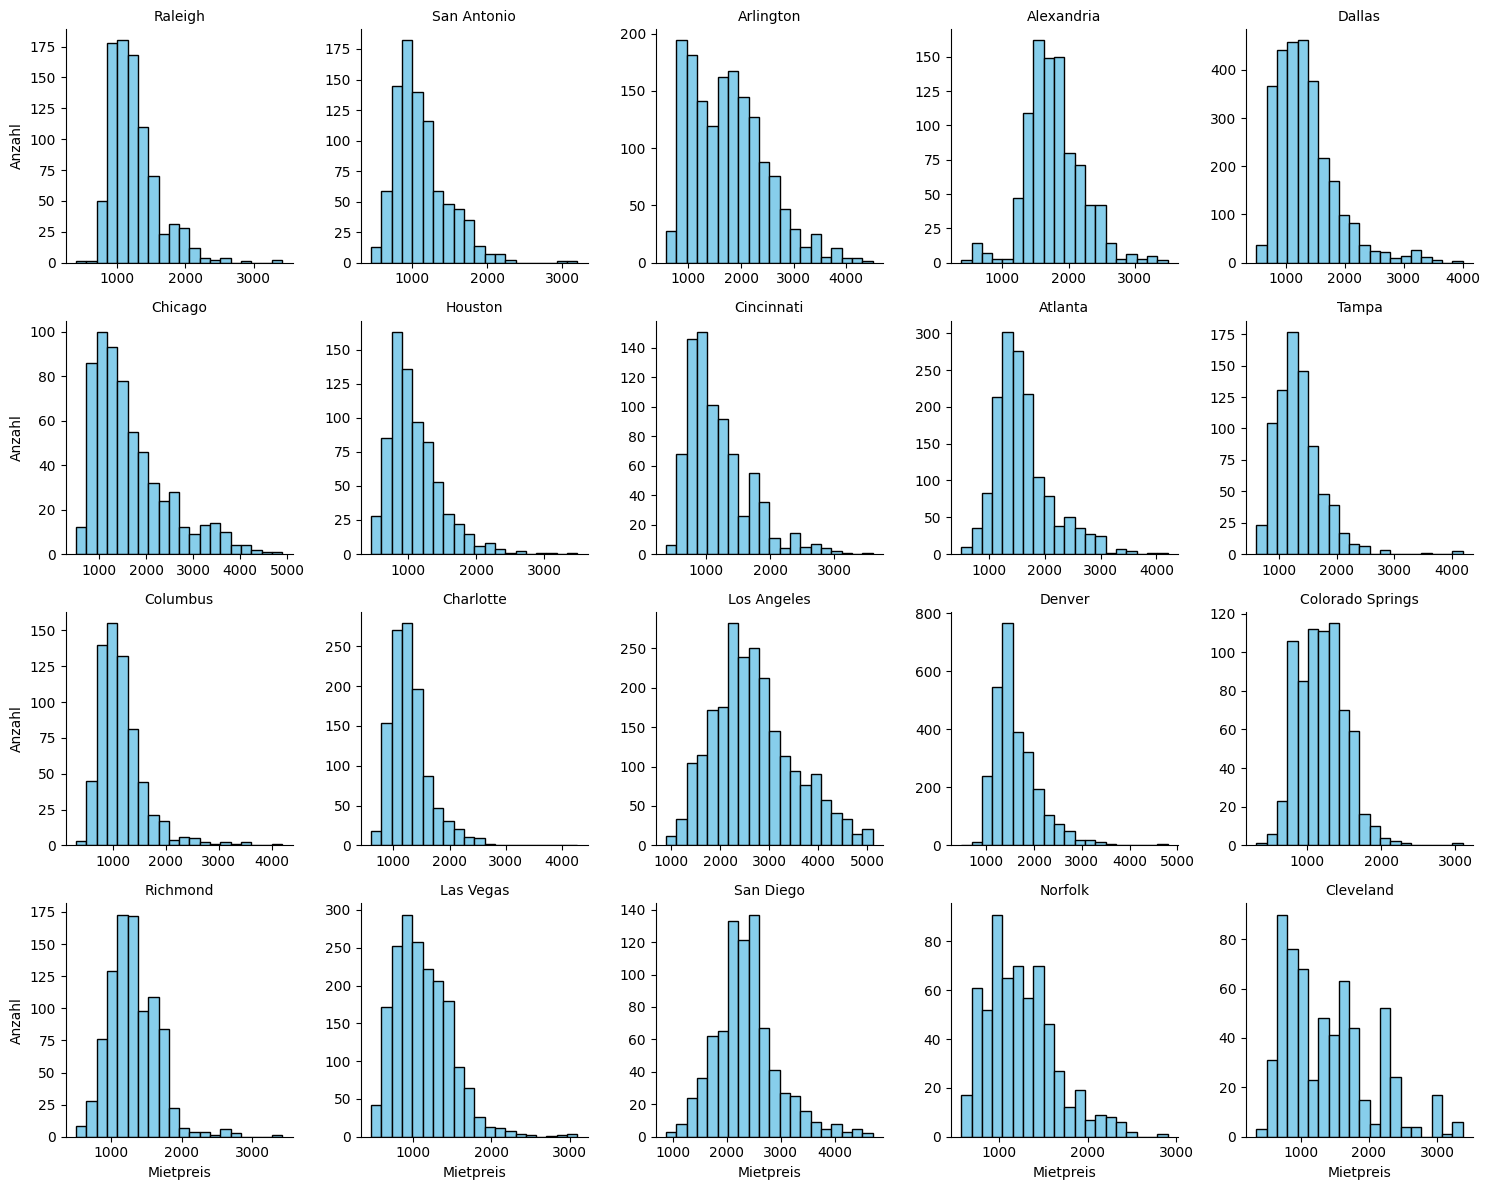

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
top_cities = data['cityname'].value_counts().nlargest(20).index
data_top = data[data['cityname'].isin(top_cities)]

# Plot 1: Boxplot der Preisverteilung pro Stadt
plt.figure(figsize=(12,6))
sns.boxplot(x='cityname', y='price', data=data_top)
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Städten')
plt.ylabel('Mietpreis')
plt.xlabel('Stadt')
plt.tight_layout()
plt.show()

# Plot 2: Violinplot (zeigt Dichte besser)
plt.figure(figsize=(12,6))
sns.violinplot(x='cityname', y='price', data=data_top, inner='quartile', palette='pastel')
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Städten (Violinplot)')
plt.ylabel('Mietpreis')
plt.xlabel('Stadt')
plt.tight_layout()
plt.show()

# Plot 3: Histogramme pro Stadt (Faceted)
g = sns.FacetGrid(data_top, col="cityname", col_wrap=5, height=3, sharex=False, sharey=False)
g.map(plt.hist, "price", bins=20, color='skyblue', edgecolor='black')
g.set_titles("{col_name}")
g.set_axis_labels("Mietpreis", "Anzahl")
plt.tight_layout()
plt.show()


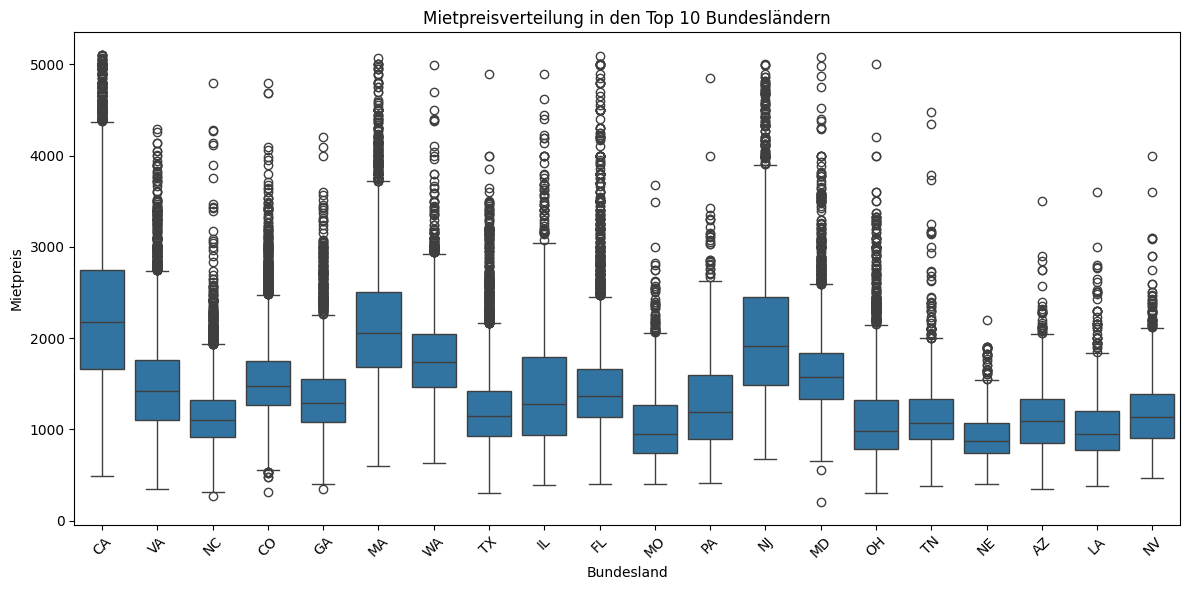

C:\Users\User\AppData\Local\Temp\ipykernel_26148\3304174219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='state', y='price', data=data_top_states, inner='quartile', palette='pastel')


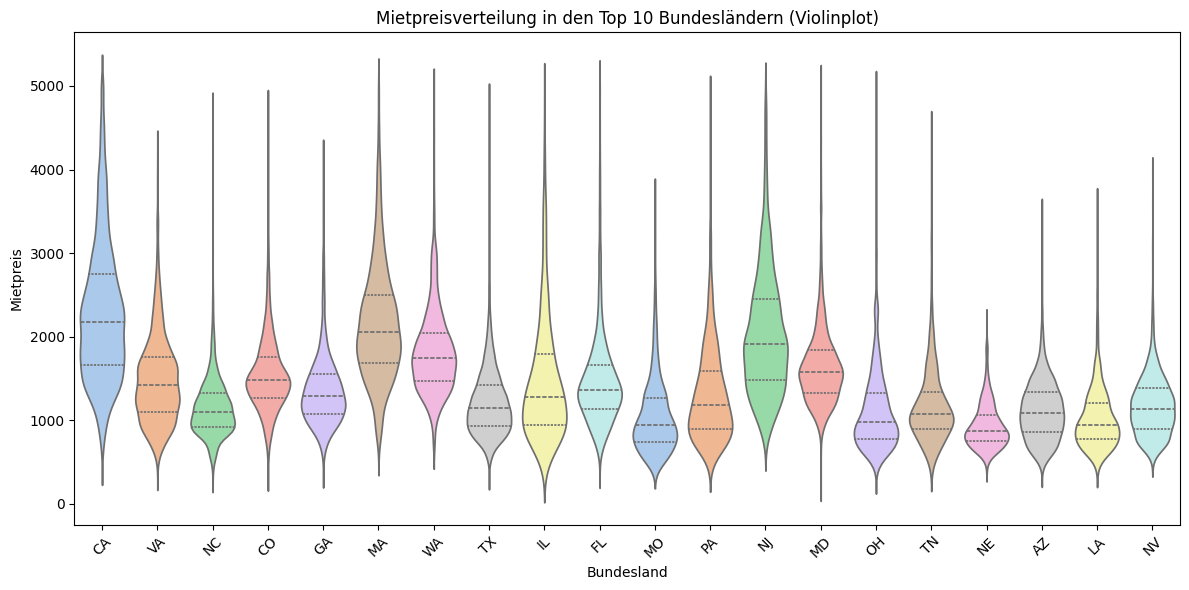

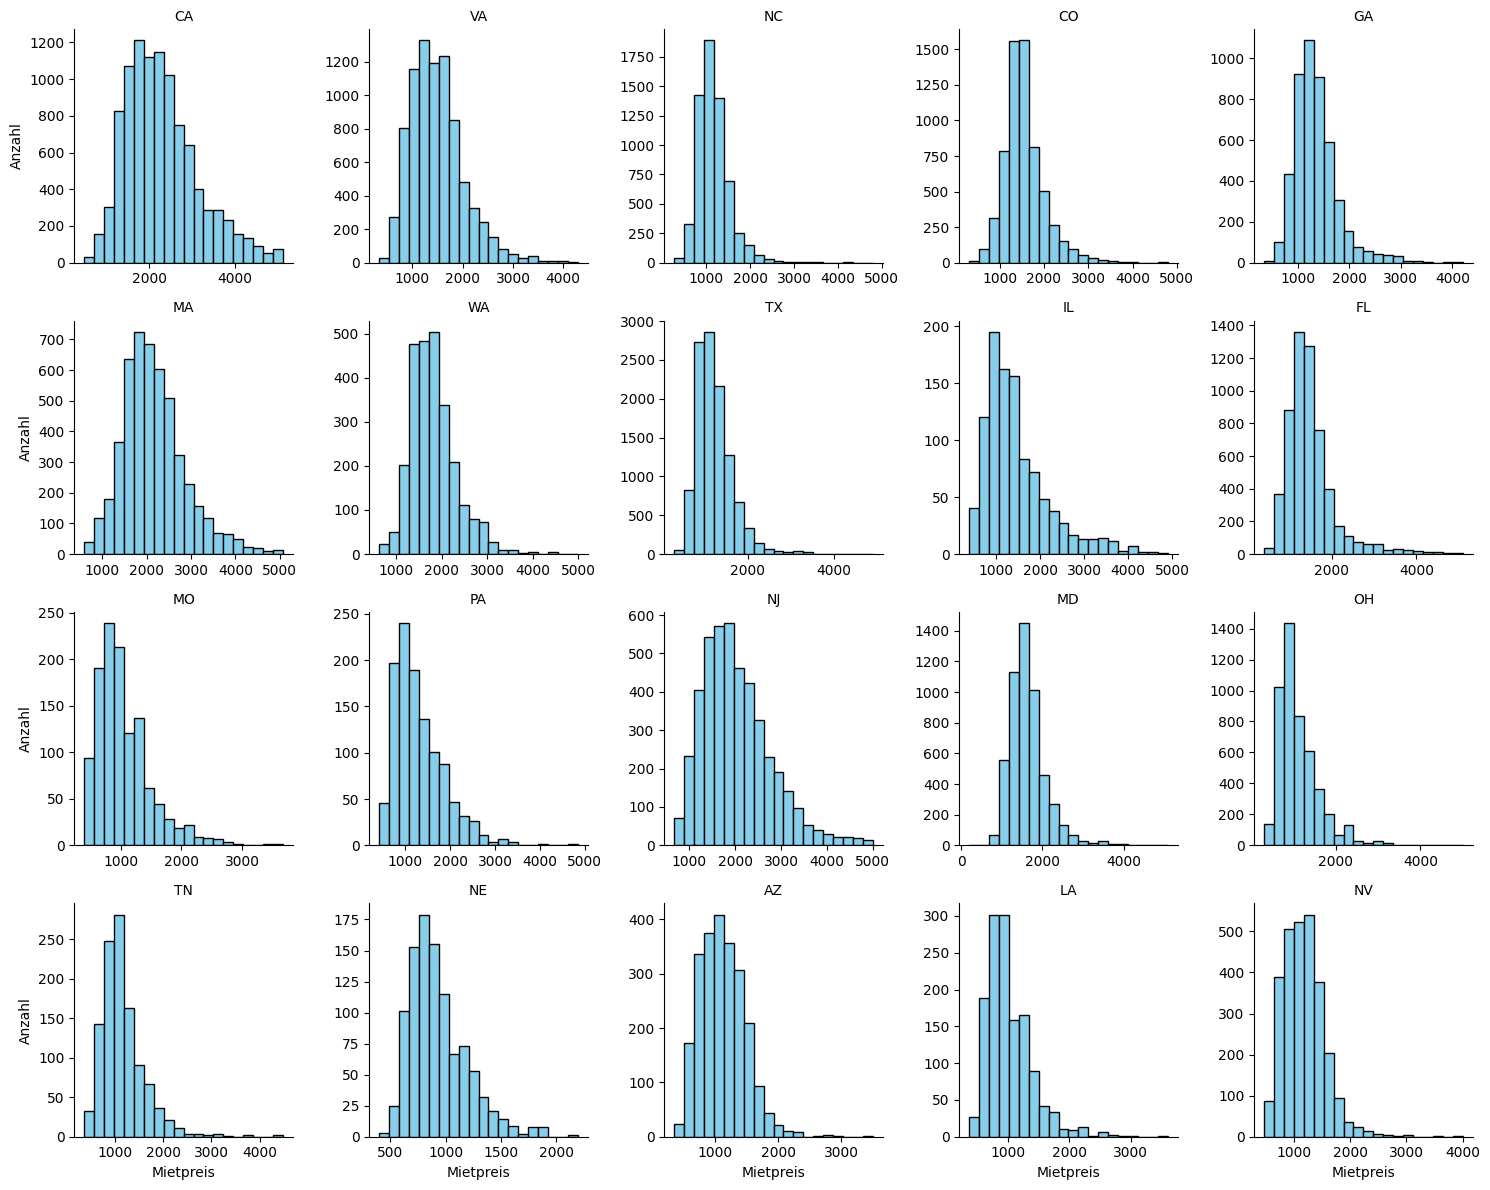

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nur Top 10 States nach Anzahl der Einträge
top_states = data['state'].value_counts().nlargest(20).index
data_top_states = data[data['state'].isin(top_states)]

# Plot 1: Boxplot der Preisverteilung pro Bundesland
plt.figure(figsize=(12,6))
sns.boxplot(x='state', y='price', data=data_top_states)
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Bundesländern')
plt.ylabel('Mietpreis')
plt.xlabel('Bundesland')
plt.tight_layout()
plt.show()

# Plot 2: Violinplot (zeigt Dichte besser)
plt.figure(figsize=(12,6))
sns.violinplot(x='state', y='price', data=data_top_states, inner='quartile', palette='pastel')
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Bundesländern (Violinplot)')
plt.ylabel('Mietpreis')
plt.xlabel('Bundesland')
plt.tight_layout()
plt.show()

# Plot 3: Histogramme pro Bundesland (Faceted)
g = sns.FacetGrid(data_top_states, col="state", col_wrap=5, height=3, sharex=False, sharey=False)
g.map(plt.hist, "price", bins=20, color='skyblue', edgecolor='black')
g.set_titles("{col_name}")
g.set_axis_labels("Mietpreis", "Anzahl")
plt.tight_layout()
plt.show()


In [138]:
import pandas as pd
import numpy as np

city_features = data.groupby('cityname')['price'].agg([
    np.median, np.mean, lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)
]).rename(columns={'<lambda_0>': '25th_percentile', '<lambda_1>': '75th_percentile'})
print(city_features)

C:\Users\User\AppData\Local\Temp\ipykernel_26148\1561339941.py:4: FutureWarning: The provided callable <function median at 0x00000189FE820400> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  city_features = data.groupby('cityname')['price'].agg([
C:\Users\User\AppData\Local\Temp\ipykernel_26148\1561339941.py:4: FutureWarning: The provided callable <function mean at 0x00000189FE6C5E40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  city_features = data.groupby('cityname')['price'].agg([


             median         mean  25th_percentile  75th_percentile
cityname                                                          
Abbeville     711.0   722.111111           711.00           829.00
Aberdeen     1525.5  1517.409091          1383.75          1722.00
Abilene       697.5   747.000000           631.25           893.75
Abingdon     1374.5  1249.416667          1120.00          1465.00
Abington     1979.0  1920.275000          1758.50          2130.50
...             ...          ...              ...              ...
Zachary      1564.5  1464.000000          1233.00          1681.00
Zanesville    625.0   625.000000           625.00           625.00
Zebulon      1517.0  1671.235294          1399.00          2030.00
Zephyrhills  1515.0  1469.647059          1375.00          1575.00
Zion          819.0   838.666667           734.50           933.00

[2960 rows x 4 columns]


In [180]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
city_features['cluster'] = kmeans.fit_predict(city_features)
cluster_cities = {i: city_features[city_features['cluster'] == i].index.tolist() for i in range(3)}
print(cluster_cities)
print(city_features)
# city_features hat schon die Cluster-Zuordnung
# city_features.index enthält die Stadtnamen
# city_features['cluster'] enthält die Cluster-Nummer
X = data.copy()
for col in ["cityname", "state"]:
    X[col] = X[col].astype("category")
y= data["price"]
# Neue Spalte in X hinzufügen, basierend auf 'cityname'
X['city_cluster'] = X['cityname'].map(city_features['cluster'])

X_cluster_0 = X[X["city_cluster"]==0]
X_cluster_1 = X[X["city_cluster"]==1]
X_cluster_2 = X[X["city_cluster"]==2]
y_cluster_0 = X_cluster_0["price"]
y_cluster_1 = X_cluster_1["price"]
y_cluster_2 = X_cluster_2["price"]


print(X_cluster_2["price"].mean())
X_cluster_0 = X_cluster_0.drop(columns = ["price"])
X_cluster_1 = X_cluster_1.drop(columns = ["price"])
X_cluster_2 = X_cluster_2.drop(columns = ["price"])
print(X_cluster_1.columns)
X = X.drop(columns = ["price"])

{0: ['Abbeville', 'Abilene', 'Absecon', 'Adelanto', 'Adelphi', 'Agawam', 'Aiken', 'Akron', 'Alanson', 'Albany', 'Albemarle', 'Albertville', 'Albuquerque', 'Allendale', 'Allentown', 'Alliance', 'Allison Park', 'Aloha', 'Altamonte Springs', 'Altavista', 'Altoona', 'Alvin', 'Amarillo', 'Ambridge', 'Amelia', 'Ames', 'Amsterdam', 'Anchorage', 'Anderson', 'Angleton', 'Anniston', 'Anoka', 'Ansonia', 'Anthem', 'Antioch', 'Apache Junction', 'Apex', 'Apple Valley', 'Appleton', 'Arcata', 'Archbald', 'Arden', 'Arkadelphia', 'Arvilla', 'Asheboro', 'Asheville', 'Ashford', 'Ashtabula', 'Athens', 'Athol', 'Atkins', 'Atlantic City', 'Augusta', 'Austell', 'Austin', 'Avon Lake', 'Avondale', 'Avondale Estates', 'Azle', 'Bacliff', 'Bahama', 'Bakersfield', 'Balch Springs', 'Ballwin', 'Bangor', 'Barberton', 'Bardstown', 'Barrington', 'Barstow', 'Baskerville', 'Batavia', 'Bath', 'Baton Rouge', 'Battle Creek', 'Battle Mountain', 'Bay City', 'Bay Minette', 'Bay Saint Louis', 'Baytown', 'Bealeton', 'Bear', 'Beau

In [181]:
from Nested_CV_targetEncoding import NestedCVRegressorWithTargetEncoding
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    random_state=42,
    n_jobs=-1,
    enable_categorical=True
    # alle CPU-Kerne nutzen
)

# Hyperparameter-Grid
xgb_params = {
    "n_estimators": [300],
    "max_depth": [2,5,7],
    "learning_rate": [0.2],
    #"subsample": [0.8, 1.0],
    #"colsample_bytree": [0.8, 1.0],
    #"gamma": [0, 1],  # Minimum Loss Reduction
    #"reg_alpha": [0, 0.1],  # L1 Regularisierung
    #"reg_lambda": [1, 5]    # L2 Regularisierung
}

xgb_cv = NestedCVRegressorWithTargetEncoding(xgb_model, xgb_params, encode_cols=[], scaler=None)

print("Starte XGBoost Nested CV...")
xgb_cv.run(X_cluster_2, y_cluster_2, output=True)

print("\n--- XGBoost Ergebnisse ---")
print("Mean R²:", xgb_cv.get_mean_r2())
print("Best params:", xgb_cv.get_best_params())


Starte XGBoost Nested CV...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Outer Fold 1/5 | Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300} | Fit Time: 5.613s | Outer R²: 0.702 | MSE: 71864.360
Fitting 5 folds for each of 3 candidates, totalling 15 fits


KeyboardInterrupt: 